In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from numpy.polynomial import Polynomial
from mech_prop_db import ultimate_tensile_strength_w,ultimate_tensile_strength, yield_strength,minimum_uniform_elongation
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times'],'weight': 'bold'})
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = "".join([r"\usepackage{newtxtext,newtxmath}",r"\boldmath"])
from matplotlib.ticker import AutoMinorLocator

temperature = np.linspace(293.15,1200,100)
KSI_TO_MPA = 6.89476
NCM2_TO_MPA = 0.01
KGMM2_TO_MPA = 9.80665

#ITER
_,iter_w_df_uts= ultimate_tensile_strength_w(temperature,return_data= True)
iter_wl10_df_uts = ultimate_tensile_strength(temperature)
iter_wl10_df_uts= pd.DataFrame(iter_wl10_df_uts,index = temperature,columns = ['UTS [MPa]'])

iter_w_min_unif_elongation = minimum_uniform_elongation(temperature)
iter_w_min_unif_elongation = pd.DataFrame(iter_w_min_unif_elongation,index = temperature,columns = ['Min Unif Elongation [%]'])

iter_w_ys = pd.read_csv('data/w_iter_yield_strength',index_col= None,header = 0)
iter_w_df_uts = pd.read_csv('data/w_uts',index_col= None,header = 0)

wl10_iter_uts = ultimate_tensile_strength(temperature)

#Young + Write
younger_df_unirradiated = pd.read_csv('data/younger_wright_dat1.PNG.csv',header = 0,index_col = 0)
younger_df_irradiated = pd.read_csv('data/younger_wright_dat2.PNG.csv',header = 0,index_col = 0)

younger_df_unirradiated['Yield Strength [MPa]'] = NCM2_TO_MPA*younger_df_unirradiated['Yield Strength [N/cm^2] e3'].astype(float)*1e3
younger_df_unirradiated['UTS [MPa]'] = NCM2_TO_MPA*younger_df_unirradiated['Ultimate Tensile Strength [N/cm^2] e3'].astype(float)*1e3
younger_df_unirradiated['Test Temperature [C]'] = younger_df_unirradiated['Test Temperature [K]'].astype(float) + 273.15


younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()]  \
    =younger_df_irradiated['Brittle Fracture Strength [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()] 

younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()] \
    = younger_df_irradiated['Lower Yield Point [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()] 

younger_df_irradiated['Yield Strength [MPa]'] = NCM2_TO_MPA*younger_df_irradiated['Yield Strength [N/cm^2] e3'].astype(float)*1e3
younger_df_irradiated['UTS [MPa]'] = NCM2_TO_MPA*younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].astype(float)*1e3

younger_df_irradiated['Test Temperature [C]'] = younger_df_irradiated['Test Temperature [K]'].astype(float) + 273.15

#Mabouchi
mabuchi_wdf = pd.read_csv('data/mabuchi_w.csv')
mabuchi_wL10df = pd.read_csv('data/mabuchi_wl10.csv')

#Nogami
nogami_df = pd.read_csv('data/nogami_data.csv',index_col = 0)

#Haibany
habainy_df = pd.read_csv('data/habainy.csv')

#Yin
yin_df = pd.read_csv('data/yin_data2020.csv').iloc[8:]
for column in yin_df.columns:
    if column not in ['Materials']:
        yin_df[column].iloc[yin_df[column] == '�'] = np.nan
        yin_df[column] = yin_df[column].astype(float)

#Miyazawa
miyazawa_df = pd.read_csv('data/miyazawa_data2020.csv')
for column in miyazawa_df.columns:
    if column not in ['Sample ID','Material type']:
        miyazawa_df[column].iloc[miyazawa_df[column] == '�'] = np.nan
        miyazawa_df[column] = miyazawa_df[column].astype(float)




C:\Users\mlanahan3\AppData\Local\Temp\ipykernel_250108\1959896926.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()]  \
C:\Users\mlanahan3\AppData\Local\Temp\ipykernel_250108\1959896926.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].loc[younger_df_irradiated['Ultimate Tensile Strength [N/cm^2] e3'].isna()] \
C:\Users\mlanahan3\AppData\Local\Temp\ipykernel_250108\1959896926.py:64: SettingWithCopyWarning: 
A value i

### Ultimate Tensile Stress

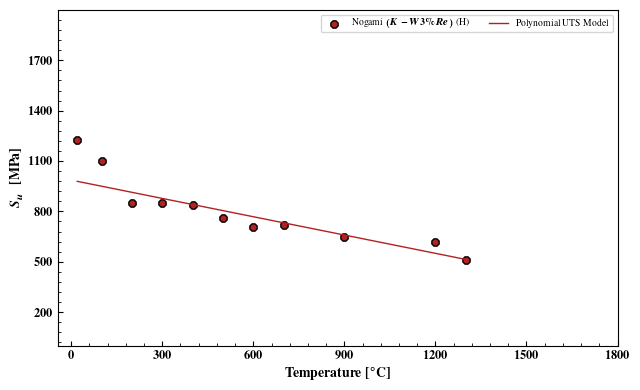

In [4]:
MARKER_SIZE = 16
ALPHA = 0.5

fig,ax = plt.subplots(figsize = (6.5,4))

ax.set_xlabel(r'\textbf{Temperature} \textbf{[}$^\circ$\textbf{C]}',fontsize = 10)
ax.set_ylabel(r'$S_u$ \ \textbf{[MPa]}',fontsize  = 10)
ax.tick_params('both',labelsize = 9,direction = 'in',which = 'both')

"""
#davis
ax.scatter(iter_w_df_uts['T [C]'],iter_w_df_uts['UTS (stress-relieved) [MPA]'],
            edgecolor = 'k',facecolor = 'black', s = MARKER_SIZE,label = 'ITER MPH (stress-relieved) $(W)$',
            marker = 'h',alpha = ALPHA)



#younger & wright
ax.scatter(younger_df_unirradiated['Test Temperature [C]'],younger_df_unirradiated['UTS [MPa]'],
            edgecolor = 'k', facecolor = 'blue', s = MARKER_SIZE,label = r'Younger \& Wright (Sintered \& Swaged)  $(W)$',
            marker = 'h',alpha = ALPHA)
         
#Nogami
ax.scatter(nogami_df.index,nogami_df['UTS [MPa] W Plate (H)'],
            edgecolor = 'k', facecolor = 'firebrick', s = MARKER_SIZE,label = 'Nogami $(W)$ (H)',
            marker = 'h',alpha = ALPHA)


ax.scatter(nogami_df.index,nogami_df['UTS [MPa] W3%Re Plate (H)'],
            edgecolor = 'k', facecolor = 'firebrick', s = MARKER_SIZE,label = r'Nogami  $(W3\%Re)$ (H)',
            marker = 'v',alpha = ALPHA)


ax.scatter(nogami_df.index,nogami_df['UTS [MPa] W3%Re-1%La2O3 Plate (L)'],
            edgecolor = 'k', facecolor = 'firebrick', s = MARKER_SIZE,label = r'Nogami $(W3\%Re-1\%La_2O_3)$  (L)',
            marker = '^',alpha = ALPHA)

"""
ax.scatter(nogami_df.index,nogami_df['UTS [MPa] K-W3%Re Plate (H)'],
            edgecolor = 'k', facecolor = 'firebrick', s = MARKER_SIZE*2,label = r'Nogami $(K-W3\%Re)$ (H)',
            marker = '8',alpha = 1.0)

"""
#Mabuchi

ax.scatter(mabuchi_wdf['T [K]'] - 273.15,mabuchi_wdf['UTS [Mpa]'],edgecolor = 'k',
           facecolor = (178/255,102/255,1),s=MARKER_SIZE,label = 'Mabuchi  $(W)$',
           marker = '^',alpha = ALPHA)

ax.scatter(mabuchi_wL10df['T [K]'] - 273.15,mabuchi_wL10df['UTS [Mpa]'],edgecolor = 'k',
           facecolor = (178/255,102/255,1),s=MARKER_SIZE,label = 'Mabuchi $(WL10)$',
           marker = 'h',alpha = ALPHA)



#Miyazawa
unirrad = np.isnan(miyazawa_df['dose [dpa]'])

alloys = {'Pure W (SR)':('Miyazawa $(W)$','h'),
          'K-doped W (SR)':('Miyazawa $(K-W)$','v'),
          'W-3%Re (SR)':('Miyazawa $(W3\%Re)$','o'),
          'K-doped W-3%Re (SR)':('Miyazawa $(K-W3\%Re)$','<')}

ai = miyazawa_df['Material type']== 'Pure W (SR)'

for column,(label,marker) in alloys.items():
        ai = miyazawa_df['Material type']== column    
        alloy_index = np.all(np.concatenate([unirrad[:,None],
                                        ai.to_numpy()[:,None]],axis = 1),
                        axis = 1)
        
        ax.scatter(miyazawa_df['Test temperature [C]'].loc[alloy_index],miyazawa_df['UTS [MPa]'].loc[alloy_index],edgecolor = 'k',
                facecolor = (0,128/255,128/255),s=MARKER_SIZE,label = label,
                marker = marker,alpha = ALPHA)


#Yin data
unirrad = yin_df['Dose (dpa)'] == 0.0
ax.scatter(yin_df['Test temperature (oC)'].loc[unirrad],yin_df['UTS (MPa)'].loc[unirrad],edgecolor = 'k',
        facecolor = (205/255,133/255,63/255),s=MARKER_SIZE,label = r'Yin $(W)$',
        marker = 'h',alpha = ALPHA)

#Habainy Data
phdf = habainy_df.loc[habainy_df['Process'] == 'Forged']

phdf = phdf.loc[phdf['Surface'] == 'polished']

ax.scatter(phdf['T [C]'],phdf['UTS [Mpa]'],edgecolor = 'k',
        facecolor = (102/255,0,102/255),s=MARKER_SIZE,label = r'Haibany  $(W)$',
        marker = 's',alpha = ALPHA)

#ITER
ax.plot(temperature,wl10_iter_uts,linewidth = 1., color = 'k',linestyle = '--',
        label = 'ITER MPH $(WL10)$')

        """

#Modeling
x,y = nogami_df.index.to_numpy(),nogami_df['UTS [MPa] K-W3%Re Plate (H)'].to_numpy()
index = np.all(
np.concatenate([~np.isnan(y)[:,np.newaxis],
                        x[:,np.newaxis] <= 1200,
                        x[:,np.newaxis] >= 50],axis = 1),
                        axis = 1)

x,y = x[index],y[index]
poly = Polynomial.fit(x,y,1)
xplot = np.linspace(nogami_df.index.min(),nogami_df.index.max(),1000)
ax.plot(xplot,poly(xplot),linewidth = 1.,color = 'firebrick',label = 'Polynomial UTS Model')

#Formatting
ax.set_xticks(np.arange(0,2100,300))
ax.set_yticks(np.arange(200,1900,300))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylim([0,2000])
ax.legend(fontsize = 7,ncols = 3)

### Rau Data
fig.tight_layout()
fig.savefig('images/uts_unirradiated_k_doped3p_Rhenium_tungsten.svg')

### Uniform Elongation

c:\Users\mlanahan3\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


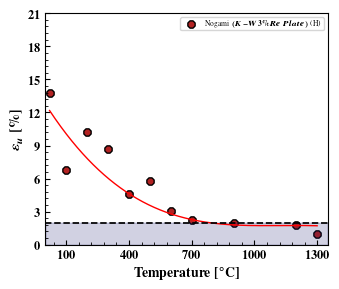

In [5]:
from analysis_util import fit_mlb_polynomial

MARKER_SIZE = 16
ALPHA = 0.5
fig,ax = plt.subplots(figsize = (3.5,3))

ax.set_xlabel(r'\textbf{Temperature} \textbf{[}$^\circ$\textbf{C]}',fontsize = 10)
ax.set_ylabel(r'$\varepsilon_u \ [\%]$',fontsize  = 10)
ax.tick_params('both',labelsize = 9,direction = 'in',which = 'both')

#ITER Data
"""
ax.plot(temperature,iter_w_min_unif_elongation,linewidth = 1.,color = 'k',
        label = 'ITER ($\mathbf{W}$)')

#Garrison


garrison_df['dpa'] = garrison_df['dpa'].astype(float)
garrison_df1 = garrison_df.loc[garrison_df['Orientation'] == 100]
index = garrison_df1['dpa'] == 0

ax.scatter(garrison_df1['Test T (C)'].loc[index],garrison_df1['UE (%)'].loc[index],edgecolor = 'k',facecolor = 'purple',
            s = 100,marker = 'h',label = '$Garrison \ et \ al.$ (<100> Single Crystal)  $(\mathbf{W})$')

garrison_df2 = garrison_df.loc[garrison_df['Orientation'] == 110]
index = garrison_df2['dpa'] == 0


ax.scatter(garrison_df2['Test T (C)'].loc[index],garrison_df2['UE (%)'].loc[index],edgecolor = 'k',facecolor = 'pink',
            s = 100,marker = 'h',label = '$Garrison \ et \ al.$ (<110> Single Crystal)  $(\mathbf{W})$')


#Nogami
ax.scatter(nogami_df.index,nogami_df['UE [%] W Plate (H)'],
            edgecolor = 'k', facecolor = 'firebrick',label = r'Nogami $(W)$ (H)',
            marker = 'h',alpha = ALPHA,s = MARKER_SIZE)

ax.scatter(nogami_df.index,nogami_df['UE [%] W3%Re Plate (L)'],
            edgecolor = 'k', facecolor = 'firebrick',label = r'Nogami $(W3\%Re)$ (L)',
            marker = 'v',alpha = ALPHA,s = MARKER_SIZE)

ax.scatter(nogami_df.index,nogami_df['UE [%] W3%Re-1%La2O3 Plate (L)'],
            edgecolor = 'k', facecolor = 'firebrick',label = r'Nogami $(W3\%Re-1\%La_2O_3)$ (L)',
            marker = '^',alpha = ALPHA,s = MARKER_SIZE)

"""     

ax.scatter(nogami_df.index,nogami_df['UE [%] K-W3%Re Plate (H)'],
            edgecolor = 'k', facecolor = 'firebrick',label = r'Nogami $(K-W3\%Re \ Plate)$ (H)',
            marker = '8',alpha = 1.,s = MARKER_SIZE*2)

#Miyazawa
"""
unirrad = np.isnan(miyazawa_df['dose [dpa]'])

alloys = {'Pure W (SR)':('Miyazawa $(W)$','h'),
          'K-doped W (SR)':('Miyazawa $(K-W)$','v'),
          'W-3%Re (SR)':('Miyazawa $(W3\%Re)$','o'),
          'K-doped W-3%Re (SR)':('Miyazawa $(K-W3\%Re)$','<')}

ai = miyazawa_df['Material type']== 'Pure W (SR)'

for column,(label,marker) in alloys.items():
        ai = miyazawa_df['Material type']== column    
        alloy_index = np.all(np.concatenate([unirrad[:,None],
                                        ai.to_numpy()[:,None]],axis = 1),
                        axis = 1)
        
        ax.scatter(miyazawa_df['Test temperature [C]'].loc[alloy_index],miyazawa_df['UE [%]'].loc[alloy_index],edgecolor = 'k',
                facecolor = (0,128/255,128/255),label = label,
                marker = marker,alpha = ALPHA,s = MARKER_SIZE)

#Yin data
unirrad = yin_df['Dose (dpa)'] == 0.0
ax.scatter(yin_df['Test temperature (oC)'].loc[unirrad],yin_df['Uniform elongation(%)'].loc[unirrad],edgecolor = 'k',
        facecolor = (205/255,133/255,63/255),label = 'Yin  $(W)$',
        marker = 'h',alpha = ALPHA,s = MARKER_SIZE)
"""

x,y = nogami_df.index.to_numpy(),nogami_df['UE [%] K-W3%Re Plate (H)'].to_numpy()
index = np.all(
np.concatenate([~np.isnan(y)[:,np.newaxis],
                        x[:,np.newaxis] <= 1200,
                        x[:,np.newaxis] >= 300],axis = 1),
                        axis = 1)

x,y = x[index],y[index]
poly = fit_mlb_polynomial(x,y,3,end_constraints= [2,4],d2_lb= -np.inf)
xplot = np.linspace(nogami_df.index.min(),nogami_df.index.max(),1000)
ax.plot(xplot,poly(xplot),linewidth = 1.,color = 'red')

ax.set_yticks(np.arange(0,24,3))
ax.set_xticks(np.arange(100,1400,300))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylim([0,21])
ax.legend(fontsize = 5.5,ncols = 2)
ax.axhline(2,linewidth = 1.25,linestyle = '--',color = 'k')
ax.set_xlim([0,1350])
ax.fill_between(np.linspace(*ax.get_xlim(),1000),0,2,color = (25/255,25/255,112/255,0.2))

fig.tight_layout()
fig.savefig('images/uniform_elongation_kdoped_3pRe.svg')